In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_exchanges = pd.read_csv('dataset/cleaned/spot_exchange.csv', sep=';')
df_exchanges.shape

(3448, 4)

Los datos fueron recolectados de la página web de CoinMarketCap el dia 1 de Mayo de 2024

In [3]:
df_exchanges.head(5)

,exchange,type,token,ticker
0,Binance TR,spot,Tether USDt,USDT
1,Binance TR,spot,Contentos,COS
2,Binance TR,spot,Pepe,PEPE
3,Binance TR,spot,Bitcoin,BTC
4,Binance TR,spot,Bonk,BONK


In [4]:
df_exchanges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   exchange  3448 non-null   object
 1   type      3448 non-null   object
 2   token     3448 non-null   object
 3   ticker    3448 non-null   object
dtypes: object(4)
memory usage: 107.9+ KB


In [5]:
df_exchanges.describe()

,exchange,type,token,ticker
count,3448,3448,3448,3448
unique,20,1,902,931
top,Crypto.com,spot,XRP,XRP
freq,200,3448,20,20


In [6]:
df_exchanges.isna().sum()

exchange    0
type        0
token       0
ticker      0
dtype: int64

No tenemos datos faltantes

In [11]:
top_spot_supported_cryptocurrency = df_exchanges['ticker'].value_counts()[:50].index.tolist()
top_spot_supported_cryptocurrency

['XRP',
 'ETH',
 'MATIC',
 'LINK',
 'XLM',
 'SHIB',
 'AVAX',
 'SOL',
 'DOT',
 'BTC',
 'GRT',
 'APE',
 'UNI',
 'ADA',
 'FET',
 'CHZ',
 'NEAR',
 'BCH',
 'DOGE',
 'LTC']

Aqui ya tenemos un conjunto de cryptomonedas a las cuales tomar en cuenta para el analisis, ya que tienen soporte en plataformas de exchanges de spot. Recolectaremos sus datos historicos de la página de Binance para realizar la predicción de crecimiento.

<Axes: xlabel='count', ylabel='exchange'>

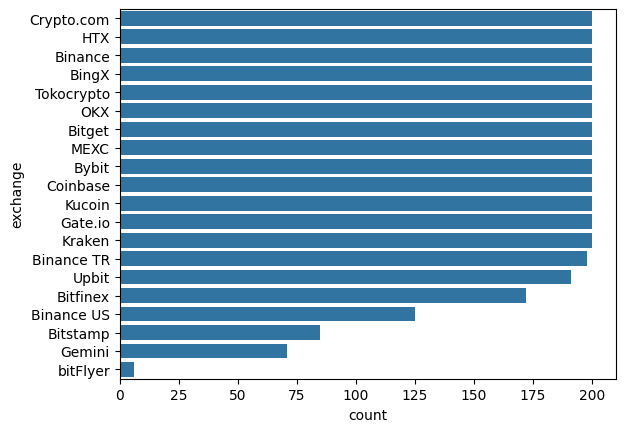

In [16]:
sns.countplot(df_exchanges, y='exchange', order=df_exchanges['exchange'].value_counts().index)

<Axes: xlabel='count', ylabel='ticker'>

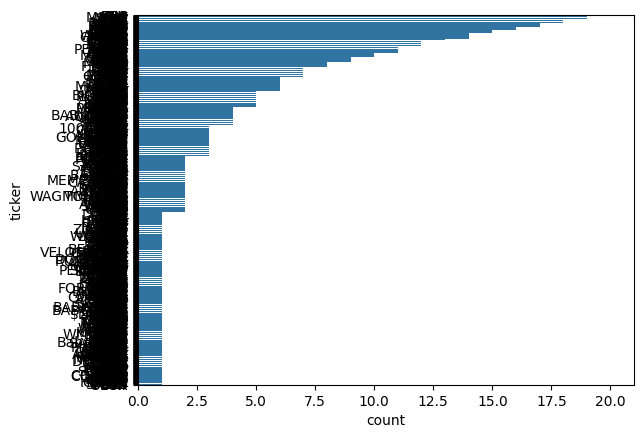

In [21]:
sns.countplot(df_exchanges, y='ticker', order=df_exchanges['ticker'].value_counts().index)

In [24]:
TOP = df_exchanges.groupby('ticker').size().sort_values(ascending=False)

ticker
ETH     20
XRP     20
BTC     19
SOL     19
SHIB    19
        ..
NODL     1
NIZA     1
NIBI     1
NGL      1
$ALT     1
Length: 931, dtype: int64

In [33]:
top_tokens = df_exchanges[['token', 'ticker']].groupby(['token', 'ticker']).size().sort_values(ascending=False)

In [50]:
df_top_tokens = pd.DataFrame(top_tokens)
df_top_tokens['top'] = range(1, len(df_top_tokens) + 1)
df_top_tokens = df_top_tokens.drop(0,axis=1)
df_top_tokens = df_top_tokens.reset_index()
df_top_tokens

,token,ticker,top
0,XRP,XRP,1
1,Ethereum,ETH,2
2,Polkadot,DOT,3
3,Shiba Inu,SHIB,4
4,Bitcoin,BTC,5
...,...,...,...
937,PlayZap,PZP,938
938,PlayDapp,PDA,939
939,Planet Mojo,MOJO,940
940,ApeX Protocol,APEX,941


In [51]:
df_top_tokens.to_csv("dataset/cleaned/top_spot_tokens.csv", sep=';', index=False)